Found 1391 images belonging to 2 classes.
Found 346 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,782,273 (105.98 MB)

 Trainable params: 4,194,561 (16.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.7269 - loss: 0.5928 - val_accuracy: 0.9335 - val_loss: 0.2521
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.9385 - loss: 0.2651 - val_accuracy: 0.9335 - val_loss: 0.2446
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.9251 - loss: 0.2755 - val_accuracy: 0.9335 - val_loss: 0.2459
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.9224 - loss: 0.2936 - val_accuracy: 0.9335 - val_loss: 0.2452
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.9336 - loss: 0.2558 - val_accuracy: 0.9335 - val_loss: 0.2446
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.9288 - loss: 0.2761 - val_accuracy: 0.9335 - val_loss: 0.2452
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.9255 - loss: 0.2698 - val_accuracy: 0.9335 - val_loss: 0.2530
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.9333 - loss: 0.2598 - val_accuracy: 0.9335 - v

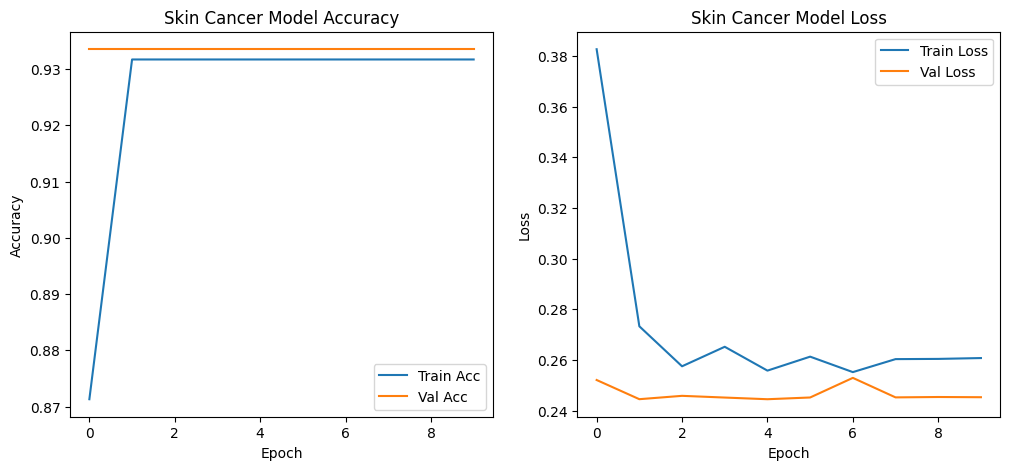

In [4]:
# ===========================
# Deep Learning for Medical Image Classification
# ===========================

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


# ===========================
# 1. Skin Cancer Detection (ResNet50 Transfer Learning)
# ===========================

# Dataset structure:
# skin_cancer/
#    benign/
#    malignant/

skin_dir = "/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration"  # replace with your path
img_size = (128, 128)
batch_size = 32

skin_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_skin = skin_gen.flow_from_directory(
    skin_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_skin = skin_gen.flow_from_directory(
    skin_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Transfer Learning with ResNet50
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))
resnet_base.trainable = False  # freeze base layers

skin_model = Sequential([
    resnet_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

skin_model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
skin_model.summary()

history_skin = skin_model.fit(
    train_skin,
    validation_data=val_skin,
    epochs=10
)

# Plot Skin Cancer results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_skin.history['accuracy'], label='Train Acc')
plt.plot(history_skin.history['val_accuracy'], label='Val Acc')
plt.title('Skin Cancer Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_skin.history['loss'], label='Train Loss')
plt.plot(history_skin.history['val_loss'], label='Val Loss')
plt.title('Skin Cancer Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [6]:
# ===========================
# 2. Pneumonia Detection (Simple CNN)
# ===========================

img_size = (128, 128)
batch_size = 32

# Directories for pneumonia dataset
train_dir = "/content/drive/MyDrive/train"
test_dir = "/content/drive/MyDrive/test"

# Generators
train_gen = ImageDataGenerator(rescale=1./255)
train_pneu = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_gen = ImageDataGenerator(rescale=1./255)
val_pneu = test_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Simple CNN
pneu_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

pneu_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
pneu_model.summary()

# Train Pneumonia CNN
history_pneu = pneu_model.fit(
    train_pneu,
    validation_data=val_pneu,
    epochs=10
)


Found 1751 images belonging to 2 classes.
Found 631 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 774s 14s/step - accuracy: 0.7692 - loss: 0.5360 - val_accuracy: 0.9223 - val_loss: 0.2115
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9632 - loss: 0.1052 - val_accuracy: 0.9223 - val_loss: 0.2156
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9752 - loss: 0.0725 - val_accuracy: 0.8558 - val_loss: 0.4378
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9634 - loss: 0.1194 - val_accuracy: 0.9049 - val_loss: 0.2916
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9811 - loss: 0.0633 - val_accuracy: 0.9144 - val_loss: 0.2386
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9882 - loss: 0.0365 - val_accuracy: 0.9113 - val_loss: 0.2598
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9919 - loss: 0.0271 - val_accuracy: 0.9081 - val_loss: 0.2672
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9961 - loss: 0.0199 - val_accuracy: 0.9081 - val_los